In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Install and import SMOTE
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Import classifiers (as per research paper)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv('/content/diabetic_data.csv')


In [5]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [6]:
df.shape

(101766, 50)

In [7]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [10]:
df['gender'].value_counts()

,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


# Handling missing values

In [11]:
# Drop unnecessary columns
df = df.drop(['weight','payer_code','medical_specialty'], axis=1)

# Remove invalid rows
df = df[
    (df['diag_1'] != '?') &
    (df['diag_2'] != '?') &
    (df['diag_3'] != '?') &
    (df['race'] != '?') &
    (df['gender'] != 'Unknown/Invalid') &
    (df['discharge_disposition_id'] != 11)
].copy()


In [12]:
df['diag_1'] = df['diag_1'].str.replace('V', '', regex=False)
df['diag_2'] = df['diag_2'].str.replace('V', '', regex=False)
df['diag_3'] = df['diag_3'].str.replace('V', '', regex=False)

In [13]:
df['citoglipton'].value_counts()

,count
citoglipton,
No,96446


In [14]:
df['examide'].value_counts()

,count
examide,
No,96446


In [15]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


# Feature Engineering

In [16]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [17]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()



,count
numchange,
0,70142
1,24922
2,1271
3,106
4,5


In [18]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [19]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

/tmp/ipython-input-4019121076.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
/tmp/ipython-input-4019121076.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
/tmp/ipython-input-4019121076.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [20]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

/tmp/ipython-input-2049695025.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
/tmp/ipython-input-2049695025.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)


In [21]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

/tmp/ipython-input-3167922647.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)


,count
age,
8,24815
7,21521
6,16546
9,16223
5,9208
4,3538
10,2594
3,1471
2,466


In [22]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape


(67580, 49)

In [23]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [24]:
df['readmitted'].value_counts()

,count
readmitted,
NO,50731
>30,34649
<30,11066


In [25]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

/tmp/ipython-input-2457122364.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO', 0)


In [26]:
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [27]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [28]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [29]:
import pandas as pd
import numpy as np

for col in ['level1_diag1', 'level1_diag2', 'level1_diag3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [30]:
def map_diag_code(x):
    if pd.isna(x):
        return 0
    if (390 <= x < 460) or (np.floor(x) == 785):
        return 1  # Circulatory
    elif (460 <= x < 520) or (np.floor(x) == 786):
        return 2  # Respiratory
    elif (520 <= x < 580) or (np.floor(x) == 787):
        return 3  # Digestive
    elif np.floor(x) == 250:
        return 4  # Diabetes
    elif (800 <= x < 1000):
        return 5  # Injury
    elif (710 <= x < 740):
        return 6  # Musculoskeletal
    elif (580 <= x < 630) or (np.floor(x) == 788):
        return 7  # Genitourinary
    elif (140 <= x < 240):
        return 8  # Neoplasms
    else:
        return 0  # Other


In [31]:
for col in ['level1_diag1', 'level1_diag2', 'level1_diag3']:
    df[col] = df[col].apply(map_diag_code)


In [32]:
df[['level1_diag1', 'level1_diag2', 'level1_diag3']].head()


,level1_diag1,level1_diag2,level1_diag3
1,0,4,0
2,0,4,0
3,0,4,1
4,8,8,4
5,1,1,4


In [33]:
import numpy as np

def map_level2_diag(x):
    if pd.isna(x):
        return 0
    if 390 <= x < 399:
        return 1
    elif 401 <= x < 415:
        return 2
    elif 415 <= x < 460:
        return 3
    elif np.floor(x) == 785:
        return 4
    elif 460 <= x < 489:
        return 5
    elif 490 <= x < 497:
        return 6
    elif 500 <= x < 520:
        return 7
    elif np.floor(x) == 786:
        return 8
    elif 520 <= x < 530:
        return 9
    elif 530 <= x < 544:
        return 10
    elif 550 <= x < 554:
        return 11
    elif 555 <= x < 580:
        return 12
    elif np.floor(x) == 787:
        return 13
    elif np.floor(x) == 250:
        return 14
    elif 800 <= x < 1000:
        return 15
    elif 710 <= x < 740:
        return 16
    elif 580 <= x < 630:
        return 17
    elif np.floor(x) == 788:
        return 18
    elif 140 <= x < 240:
        return 19
    elif 240 <= x < 280 and np.floor(x) != 250:
        return 20
    elif 680 <= x < 710 or np.floor(x) == 782:
        return 21
    elif 290 <= x < 320:
        return 22
    else:
        return 0


In [34]:
for col in ['level2_diag1', 'level2_diag2', 'level2_diag3']:
    df[col] = df[col].apply(map_level2_diag)


In [35]:
df['primary_level2_diagnosis'] = df[['level2_diag1', 'level2_diag2', 'level2_diag3']].mode(axis=1)[0]


# Exploratory Data analysis

<Axes: >

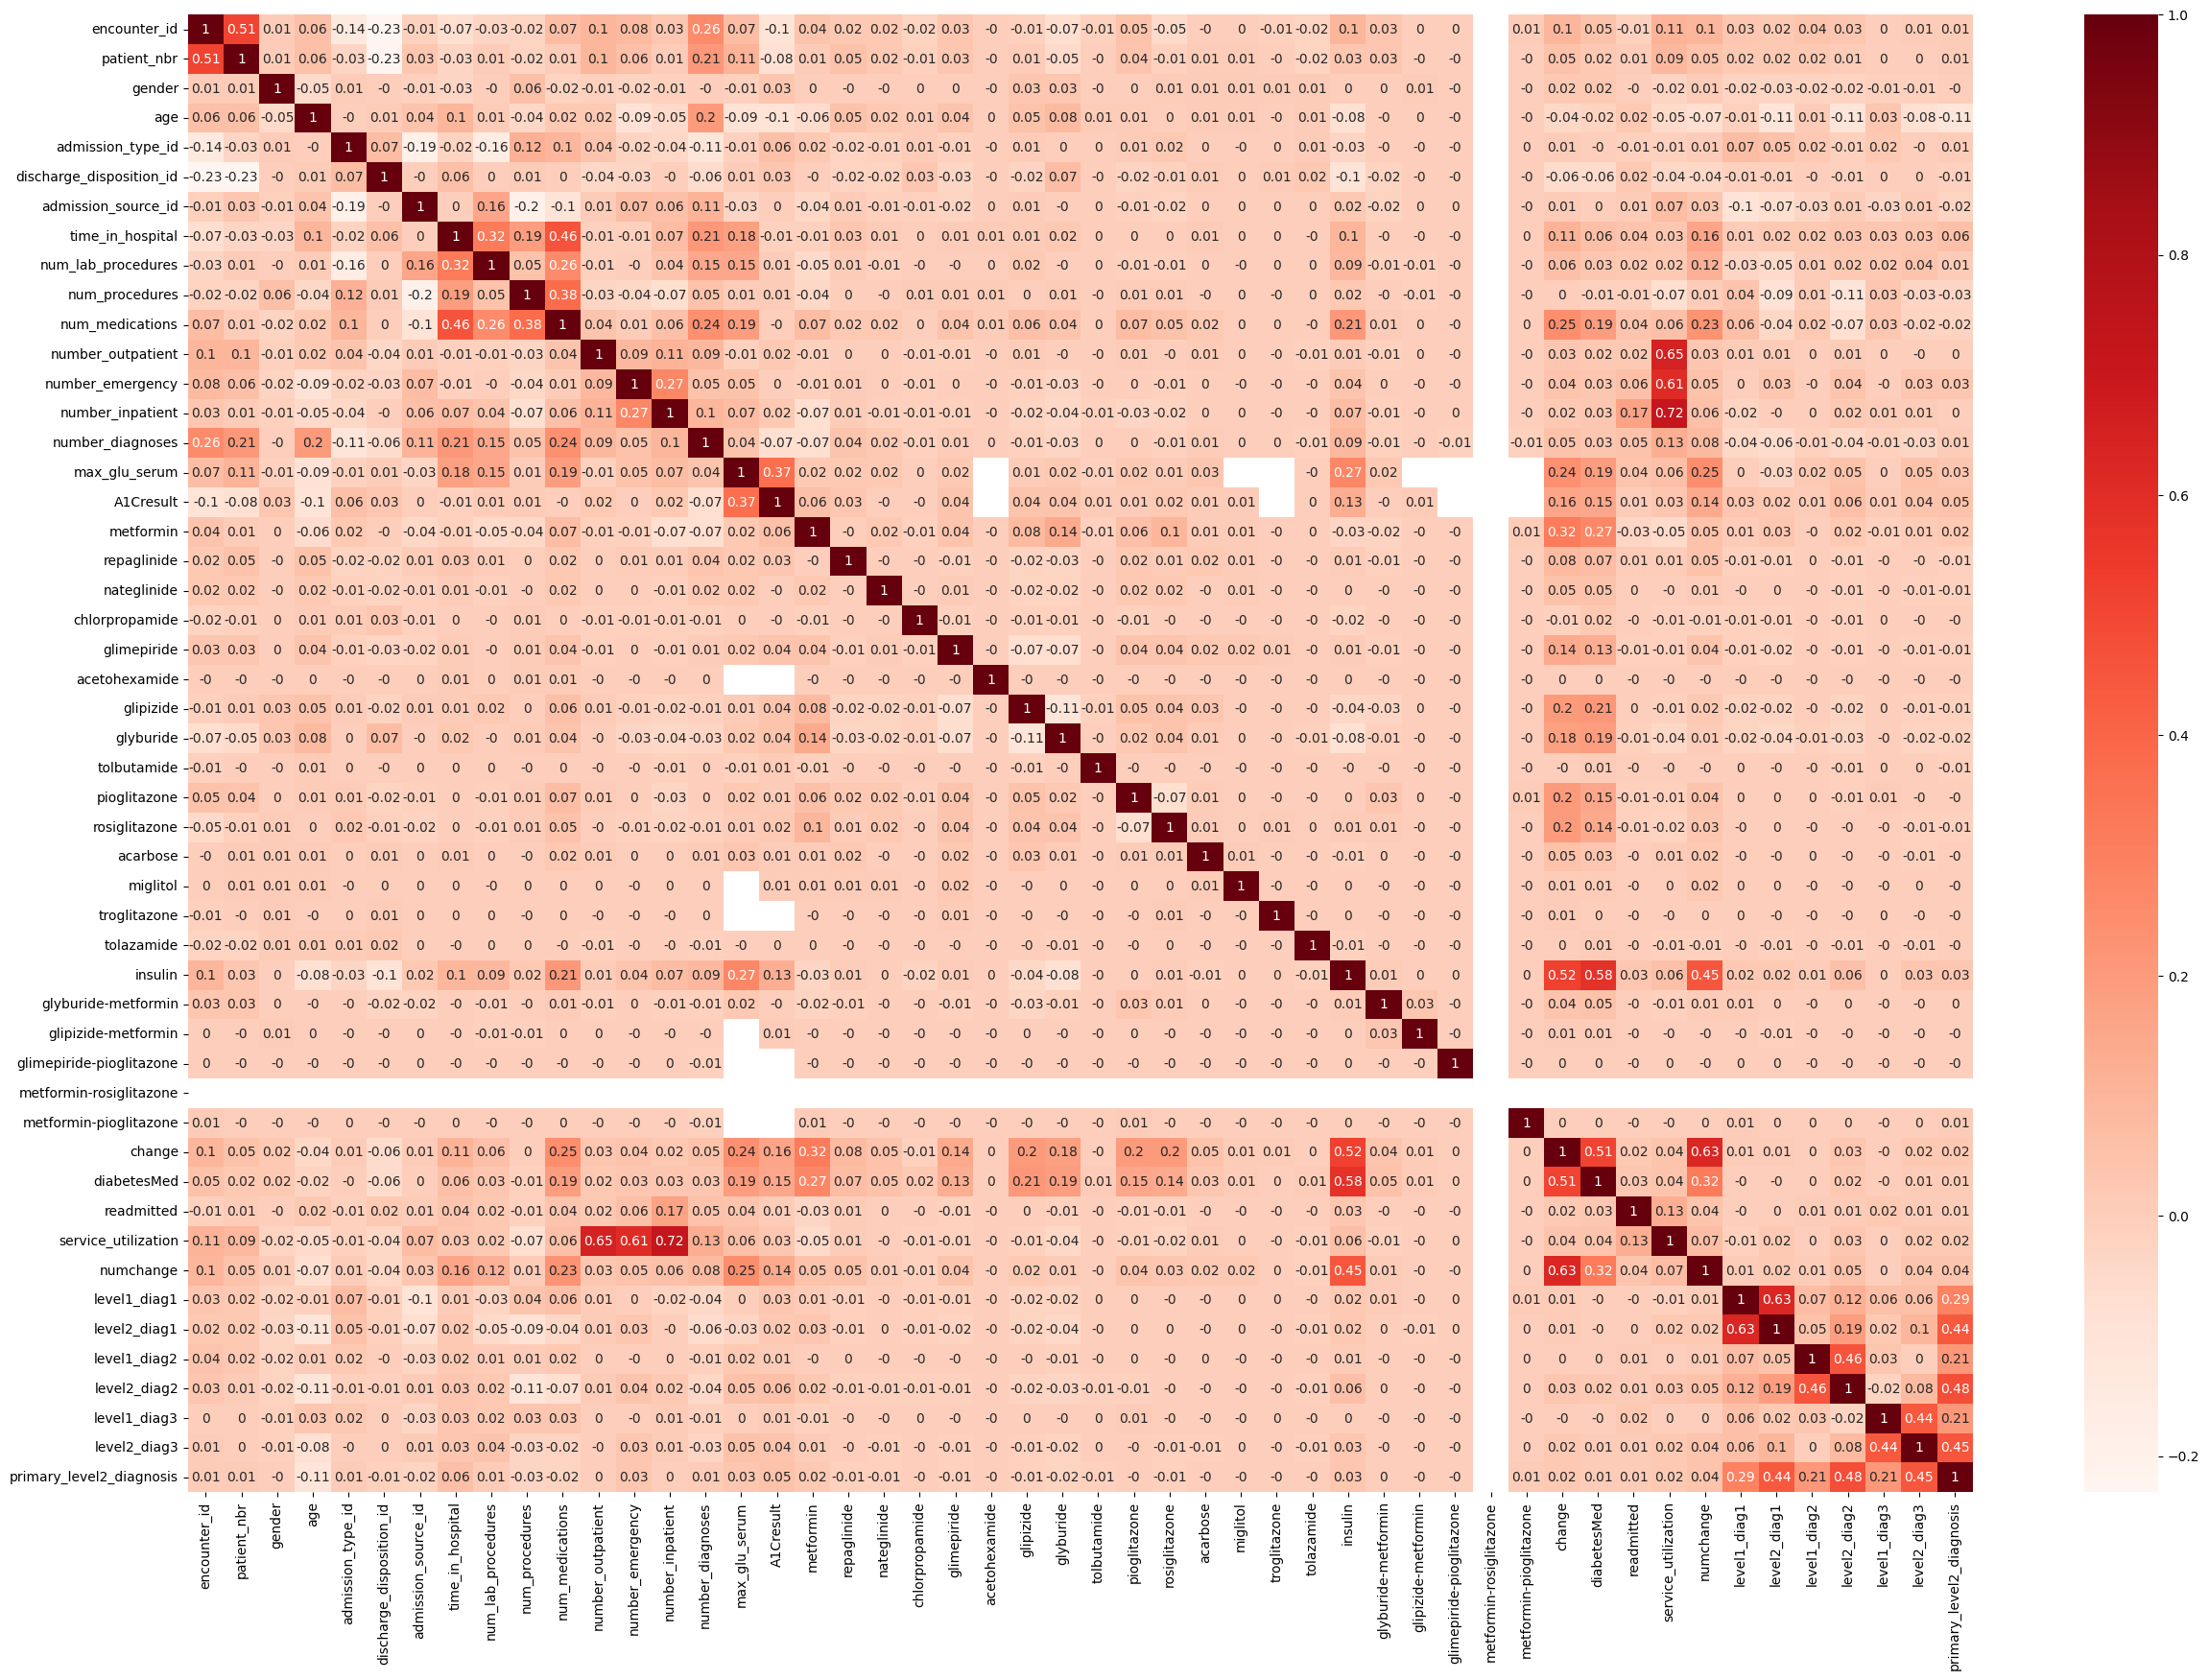

In [36]:
corr = df.select_dtypes(include=['number']).corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, cmap = 'Reds')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

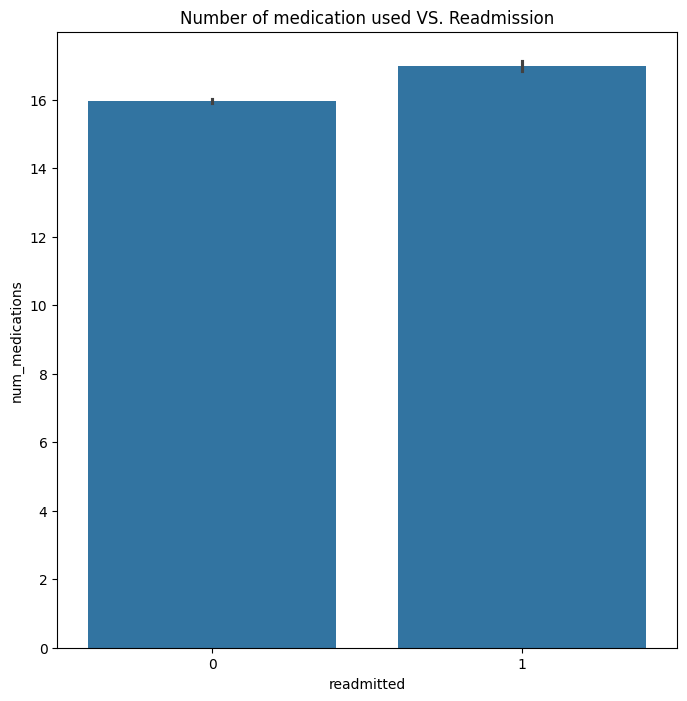

In [37]:

fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")


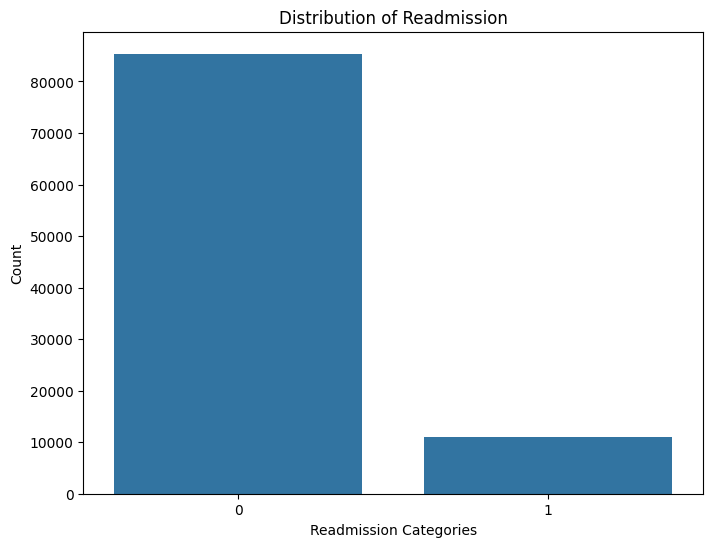

In [38]:

# Create a countplot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='readmitted')

# Set plot title and labels
plt.title('Distribution of Readmission')
plt.xlabel('Readmission Categories')
plt.ylabel('Count')

plt.show()

## **Scatter Plot — Medications vs Diagnosis**

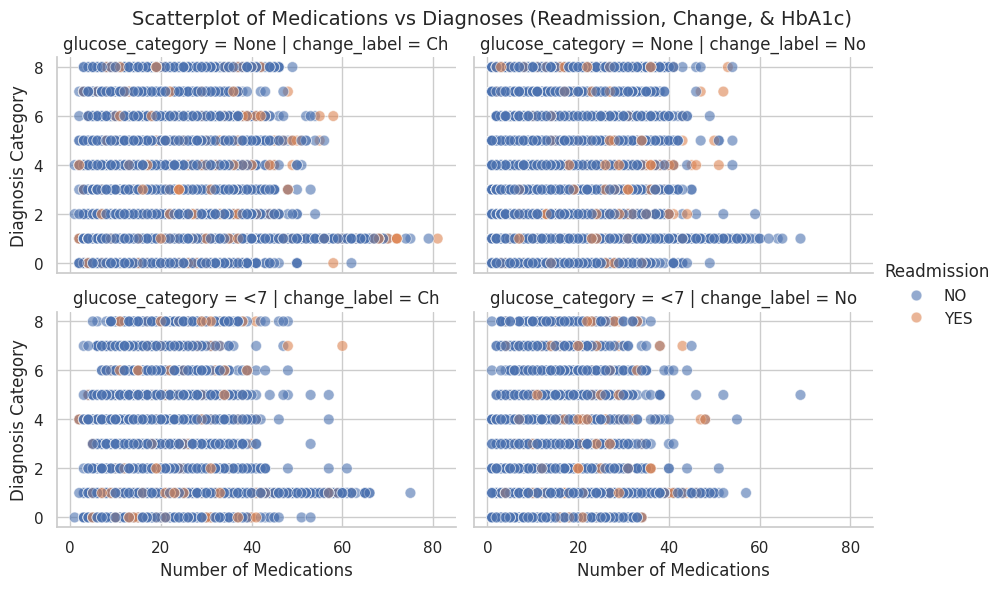

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Convert categorical/numeric codes into readable labels ---
df['readmitted_label'] = df['readmitted'].replace({
    0: 'NO',
    1: 'YES'
})

df['change_label'] = df['change'].replace({
    0: 'No',
    1: 'Ch'
})

# --- Step 2: Create HbA1c category like the paper ---
def glucose_level(val):
    if pd.isna(val):
        return 'None'
    elif float(val) < 7:
        return '<7'
    elif 7 <= float(val) <= 8:
        return 'Norm'
    else:
        return '>8'

df['glucose_category'] = df['A1Cresult'].apply(glucose_level)

# --- Step 3: Drop rows with missing necessary values ---
df_plot = df.dropna(subset=['num_medications', 'level1_diag1', 'readmitted_label', 'change_label', 'glucose_category'])

# --- Step 4: Create FacetGrid for multi-panel scatter plot ---
sns.set(style="whitegrid")

g = sns.FacetGrid(
    df_plot,
    col='change_label',        # 'No' and 'Ch'
    row='glucose_category',    # HbA1c categories (<7, >8, Norm, None)
    height=3,
    aspect=1.5
)

# --- Step 5: Scatter plot of Medications vs Diagnoses, colored by readmission ---
g.map_dataframe(
    sns.scatterplot,
    x='num_medications',
    y='level1_diag1',
    hue='readmitted_label',
    alpha=0.6,
    s=60
)

# --- Step 6: Final adjustments ---
g.add_legend(title='Readmission')
g.set_axis_labels("Number of Medications", "Diagnosis Category")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatterplot of Medications vs Diagnoses (Readmission, Change, & HbA1c)", fontsize=14)

plt.show()


## **Scatterplot of Procedures vs Diagnoses (readmission, change, & HbA1c)**

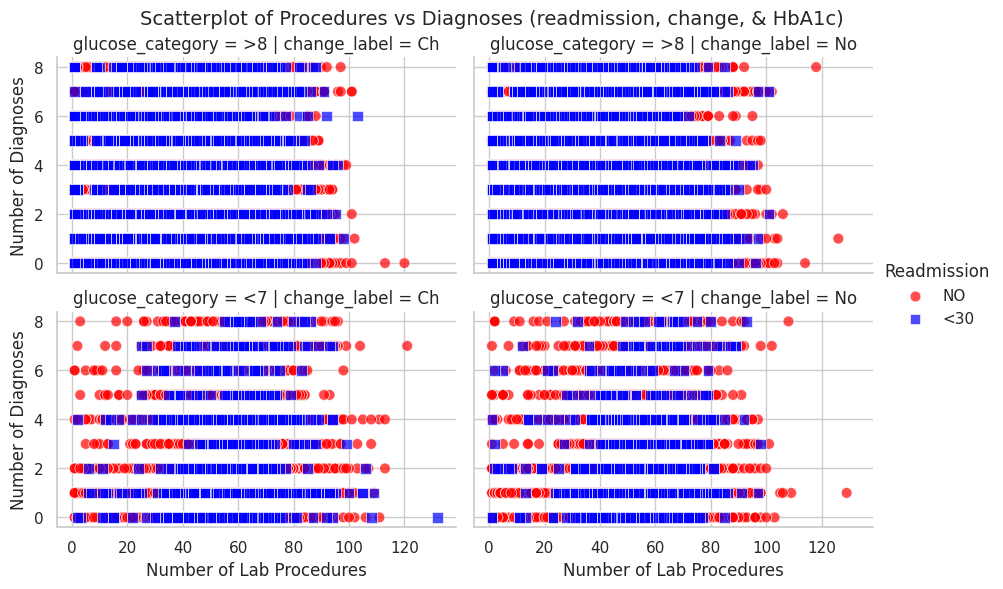

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Step 1: Prepare Readmission and Change columns ---
df['readmitted_label'] = df['readmitted'].replace({
    'NO': 'NO',
    '<30': '<30',
    '>30': '>30',
    0: 'NO',
    1: '<30',
    2: '>30'
})

df['change_label'] = df['change'].replace({
    0: 'No',
    1: 'Ch',
    'No': 'No',
    'Ch': 'Ch'
})

# --- Step 2: HbA1c (A1Cresult) → categories ---
def glucose_level(val):
    try:
        if val in ['None', np.nan]:
            return 'None'
        val = float(val)
        if val < 7:
            return '<7'
        elif 7 <= val <= 8:
            return 'Norm'
        else:
            return '>8'
    except:
        return 'None'

df['glucose_category'] = df['A1Cresult'].apply(glucose_level)

# --- Step 3: Drop missing data for plotting ---
df_plot = df.dropna(subset=['num_lab_procedures', 'level1_diag1',
                            'readmitted_label', 'change_label', 'glucose_category'])

# --- Step 4: Define colors & markers exactly like research paper ---
palette = {'NO': 'red', '<30': 'blue', '>30': 'green'}
markers = {'NO': 'o', '<30': 's', '>30': '^'}

# --- Step 5: Create FacetGrid ---
sns.set(style="whitegrid")
g = sns.FacetGrid(
    df_plot,
    col='change_label',        # No / Ch
    row='glucose_category',    # <7, >8, Norm, None
    height=3,
    aspect=1.5,
    hue='readmitted_label',
    palette=palette
)

# --- Step 6: Map scatter plot (fix legend issue) ---
g.map_dataframe(
    sns.scatterplot,
    x='num_lab_procedures',
    y='level1_diag1',
    style='readmitted_label',
    markers=markers,
    s=60,
    alpha=0.7,
    legend=False   # <--- important fix
)

# --- Step 7: Adj
g.add_legend(title='Readmission')
g.set_axis_labels("Number of Lab Procedures", "Number of Diagnoses")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatterplot of Procedures vs Diagnoses (readmission, change, & HbA1c)", fontsize=14)

plt.show()


## **Density Plot**

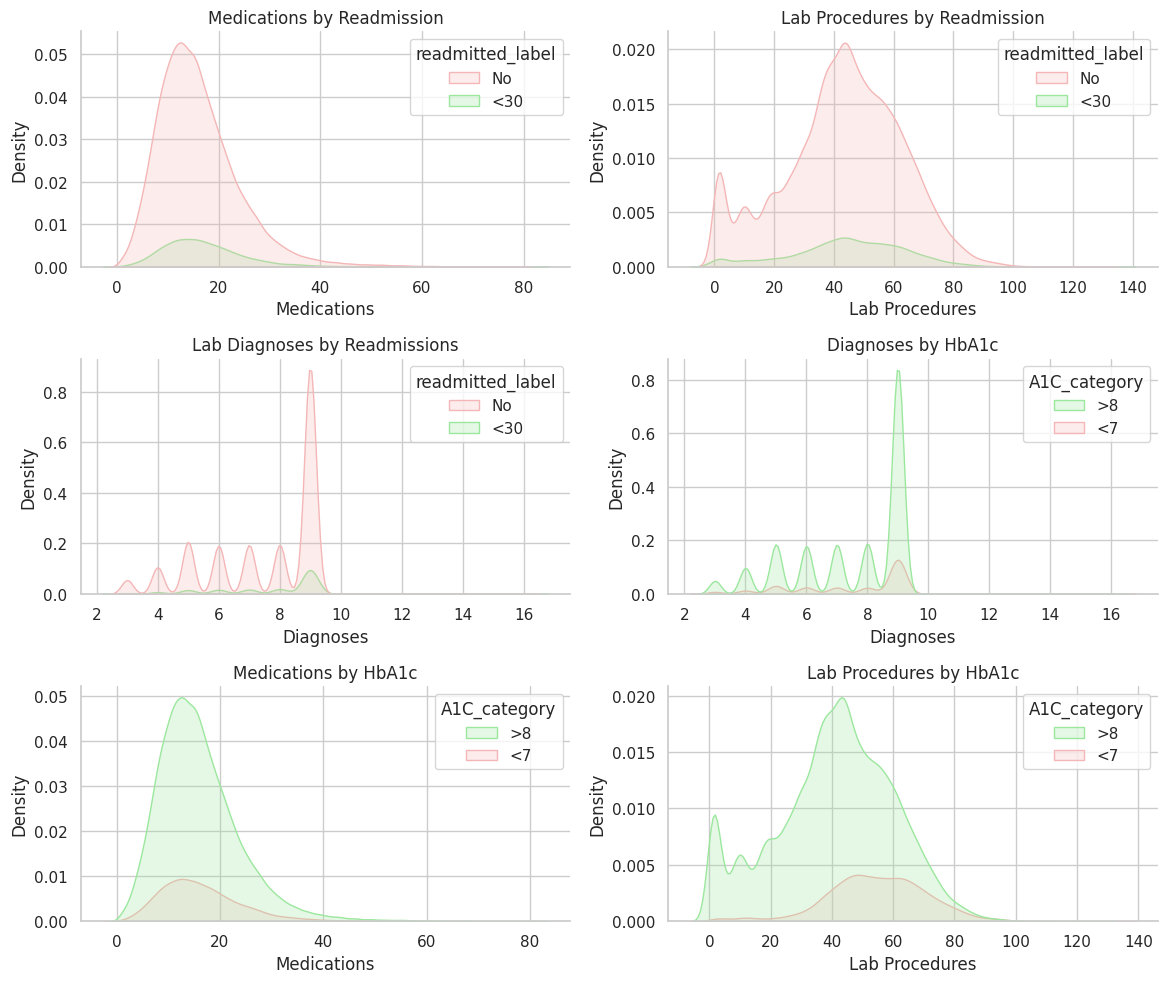

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare columns ---
df['readmitted_label'] = df['readmitted'].replace({
    'NO': 'No', '<30': '<30', '>30': '>30',
    0: 'No', 1: '<30', 2: '>30'
})

# Simplify A1C result categories
def a1c_category(val):
    try:
        if val in ['None', np.nan]:
            return 'None'
        val = float(val)
        if val < 7:
            return '<7'
        elif 7 <= val <= 8:
            return 'Norm'
        else:
            return '>8'
    except:
        return 'None'

df['A1C_category'] = df['A1Cresult'].apply(a1c_category)

# --- Step 2: Color palettes ---
readmit_palette = {'No': '#f4b6b6', '<30': '#9be79d', '>30': '#a0c4ff'}
a1c_palette = {'<7': '#f4b6b6', '>8': '#9be79d', 'Norm': '#a0c4ff', 'None': '#d0a6f7'}

# --- Step 3: Create subplots ---
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- Plot 1: Medications by Readmission ---
sns.kdeplot(data=df, x='num_medications', hue='readmitted_label', fill=True,
            palette=readmit_palette, ax=axes[0, 0])
axes[0, 0].set_title('Medications by Readmission')
axes[0, 0].set_xlabel('Medications')
axes[0, 0].set_ylabel('Density')

# --- Plot 2: Lab Procedures by Readmission ---
sns.kdeplot(data=df, x='num_lab_procedures', hue='readmitted_label', fill=True,
            palette=readmit_palette, ax=axes[0, 1])
axes[0, 1].set_title('Lab Procedures by Readmission')
axes[0, 1].set_xlabel('Lab Procedures')
axes[0, 1].set_ylabel('Density')

# --- Plot 3: Diagnoses by Readmission ---
sns.kdeplot(data=df, x='number_diagnoses', hue='readmitted_label', fill=True,
            palette=readmit_palette, ax=axes[1, 0])
axes[1, 0].set_title('Lab Diagnoses by Readmissions')
axes[1, 0].set_xlabel('Diagnoses')
axes[1, 0].set_ylabel('Density')

# --- Plot 4: Diagnoses by HbA1c ---
sns.kdeplot(data=df, x='number_diagnoses', hue='A1C_category', fill=True,
            palette=a1c_palette, ax=axes[1, 1])
axes[1, 1].set_title('Diagnoses by HbA1c')
axes[1, 1].set_xlabel('Diagnoses')
axes[1, 1].set_ylabel('Density')

# --- Plot 5: Medications by HbA1c ---
sns.kdeplot(data=df, x='num_medications', hue='A1C_category', fill=True,
            palette=a1c_palette, ax=axes[2, 0])
axes[2, 0].set_title('Medications by HbA1c')
axes[2, 0].set_xlabel('Medications')
axes[2, 0].set_ylabel('Density')

# --- Plot 6: Lab Procedures by HbA1c ---
sns.kdeplot(data=df, x='num_lab_procedures', hue='A1C_category', fill=True,
            palette=a1c_palette, ax=axes[2, 1])
axes[2, 1].set_title('Lab Procedures by HbA1c')
axes[2, 1].set_xlabel('Lab Procedures')
axes[2, 1].set_ylabel('Density')

# --- Final layout ---
sns.despine()
plt.tight_layout()
plt.show()


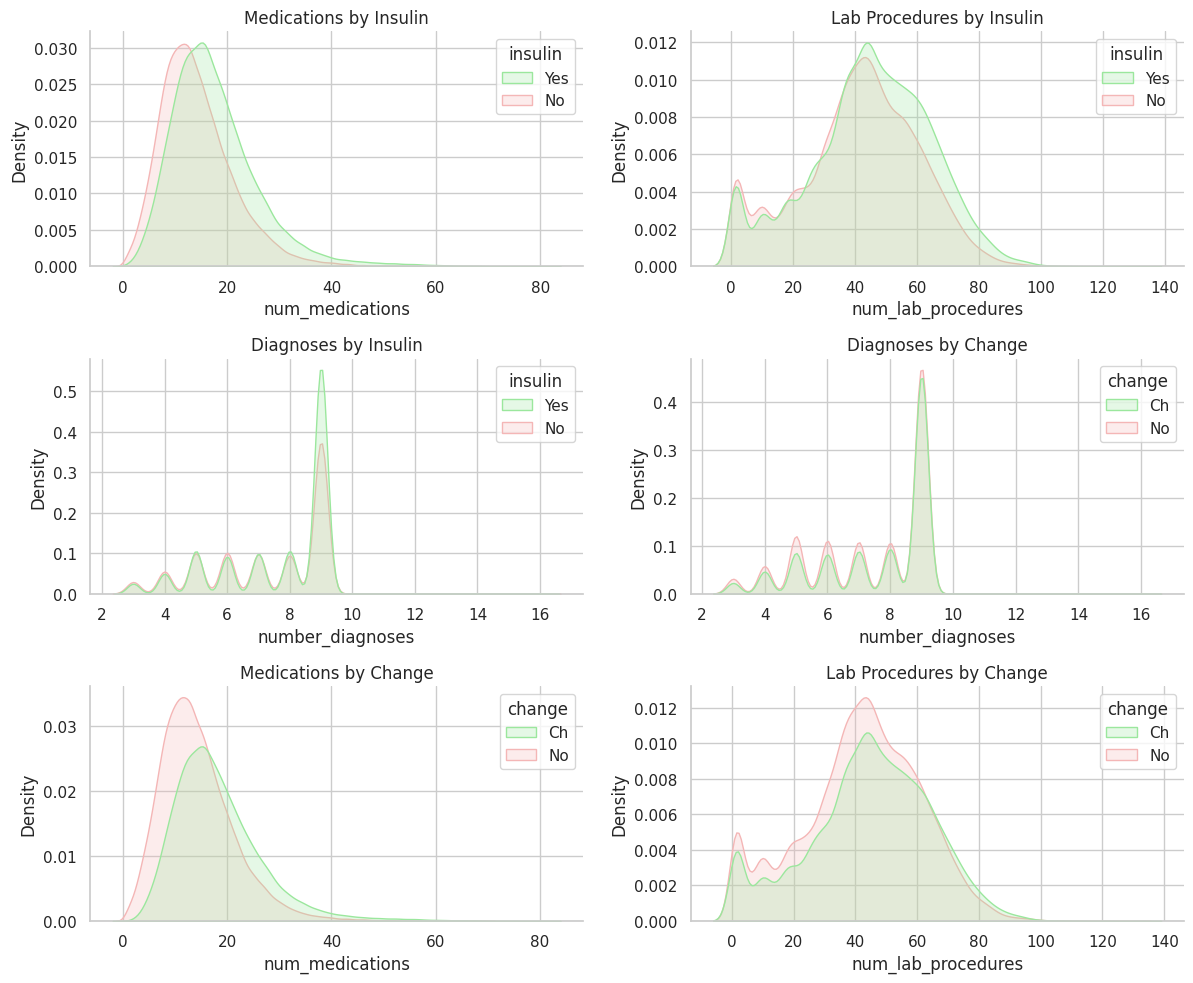

In [42]:
# Replace numeric codes with readable labels
df['insulin'] = df['insulin'].replace({0: 'No', 1: 'Yes'})
df['change'] = df['change'].replace({0: 'No', 1: 'Ch'})
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palettes
insulin_palette = {'No': '#f4b6b6', 'Yes': '#9be79d'}
change_palette = {'No': '#f4b6b6', 'Ch': '#9be79d'}

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Density plots for insulin
sns.kdeplot(data=df, x='num_medications', hue='insulin', fill=True,
            palette=insulin_palette, ax=axes[0, 0])
axes[0, 0].set_title('Medications by Insulin')

sns.kdeplot(data=df, x='num_lab_procedures', hue='insulin', fill=True,
            palette=insulin_palette, ax=axes[0, 1])
axes[0, 1].set_title('Lab Procedures by Insulin')

sns.kdeplot(data=df, x='number_diagnoses', hue='insulin', fill=True,
            palette=insulin_palette, ax=axes[1, 0])
axes[1, 0].set_title('Diagnoses by Insulin')

# Density plots for change
sns.kdeplot(data=df, x='number_diagnoses', hue='change', fill=True,
            palette=change_palette, ax=axes[1, 1])
axes[1, 1].set_title('Diagnoses by Change')

sns.kdeplot(data=df, x='num_medications', hue='change', fill=True,
            palette=change_palette, ax=axes[2, 0])
axes[2, 0].set_title('Medications by Change')

sns.kdeplot(data=df, x='num_lab_procedures', hue='change', fill=True,
            palette=change_palette, ax=axes[2, 1])
axes[2, 1].set_title('Lab Procedures by Change')

sns.despine()
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of medication used VS. Readmission')

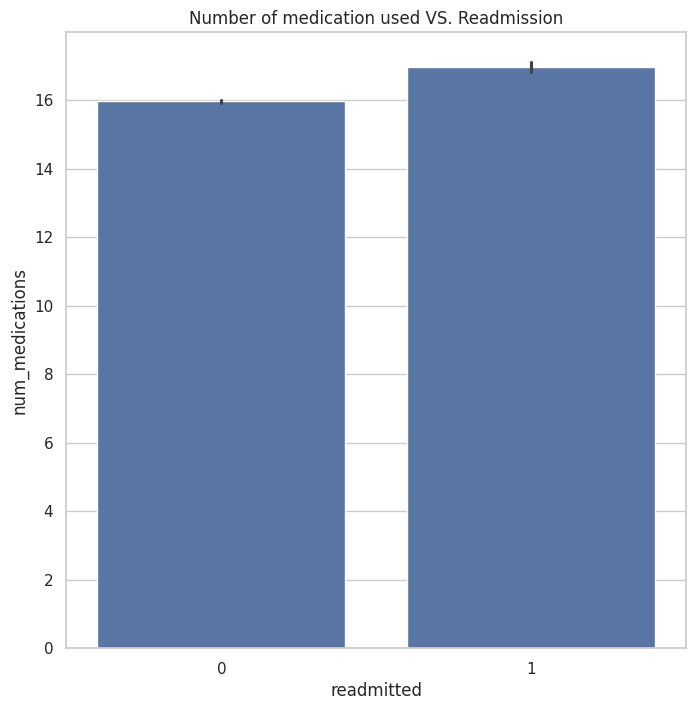

In [43]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

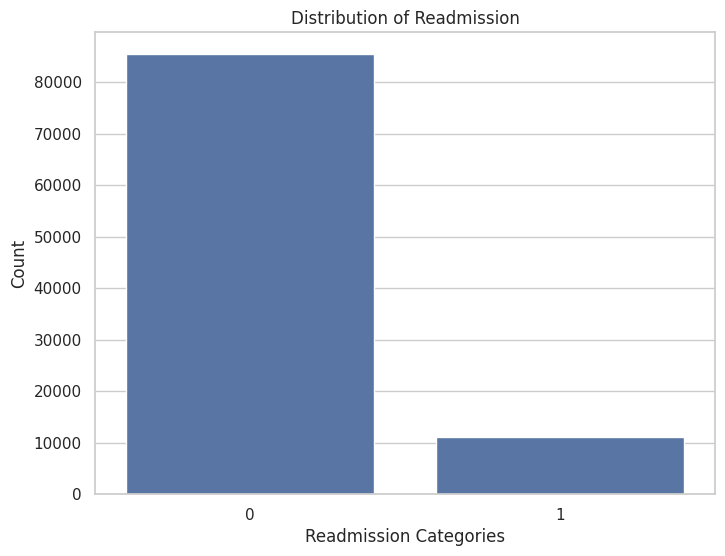

In [44]:
# Create a countplot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='readmitted')

# Set plot title and labels
plt.title('Distribution of Readmission')
plt.xlabel('Readmission Categories')
plt.ylabel('Count')

plt.show()



/tmp/ipython-input-1045526550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')
/tmp/ipython-input-1045526550.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', shade=True, label='Readmitted')


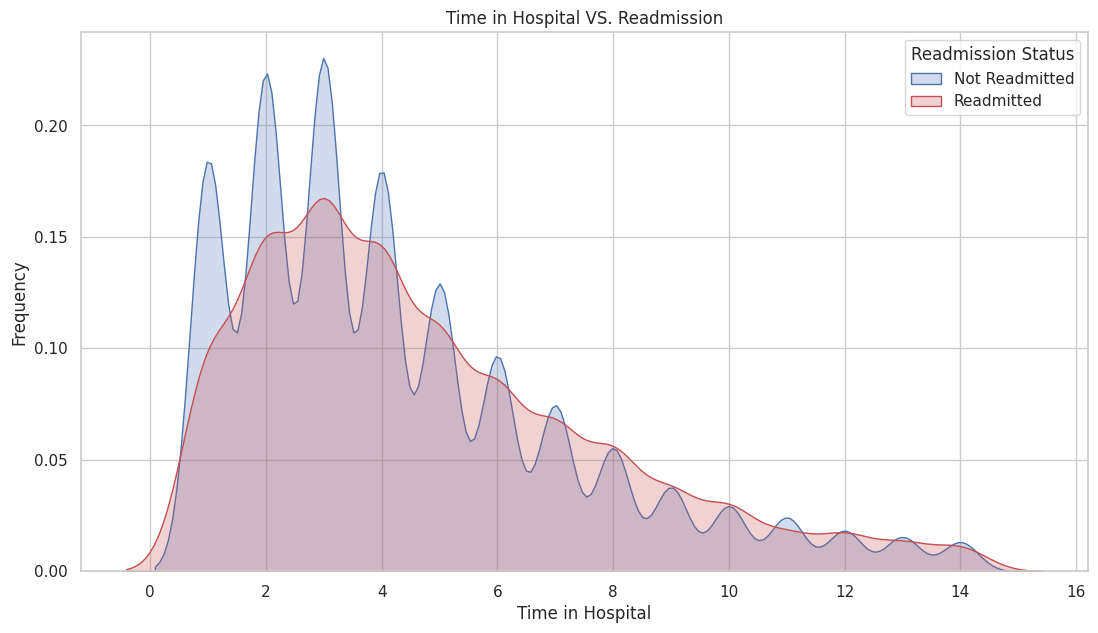

In [45]:
fig = plt.figure(figsize=(13, 7))

ax = sns.kdeplot(df.loc[(df['readmitted'] == 0), 'time_in_hospital'], color='b', shade=True, label='Not Readmitted')

ax = sns.kdeplot(df.loc[(df['readmitted'] == 1), 'time_in_hospital'], color='r', shade=True, label='Readmitted')

ax.set(xlabel='Time in Hospital', ylabel='Frequency')

plt.title('Time in Hospital VS. Readmission')

plt.legend(title='Readmission Status', loc='best')

plt.show()


Text(0.5, 1.0, 'Age of Patient VS. Readmission')

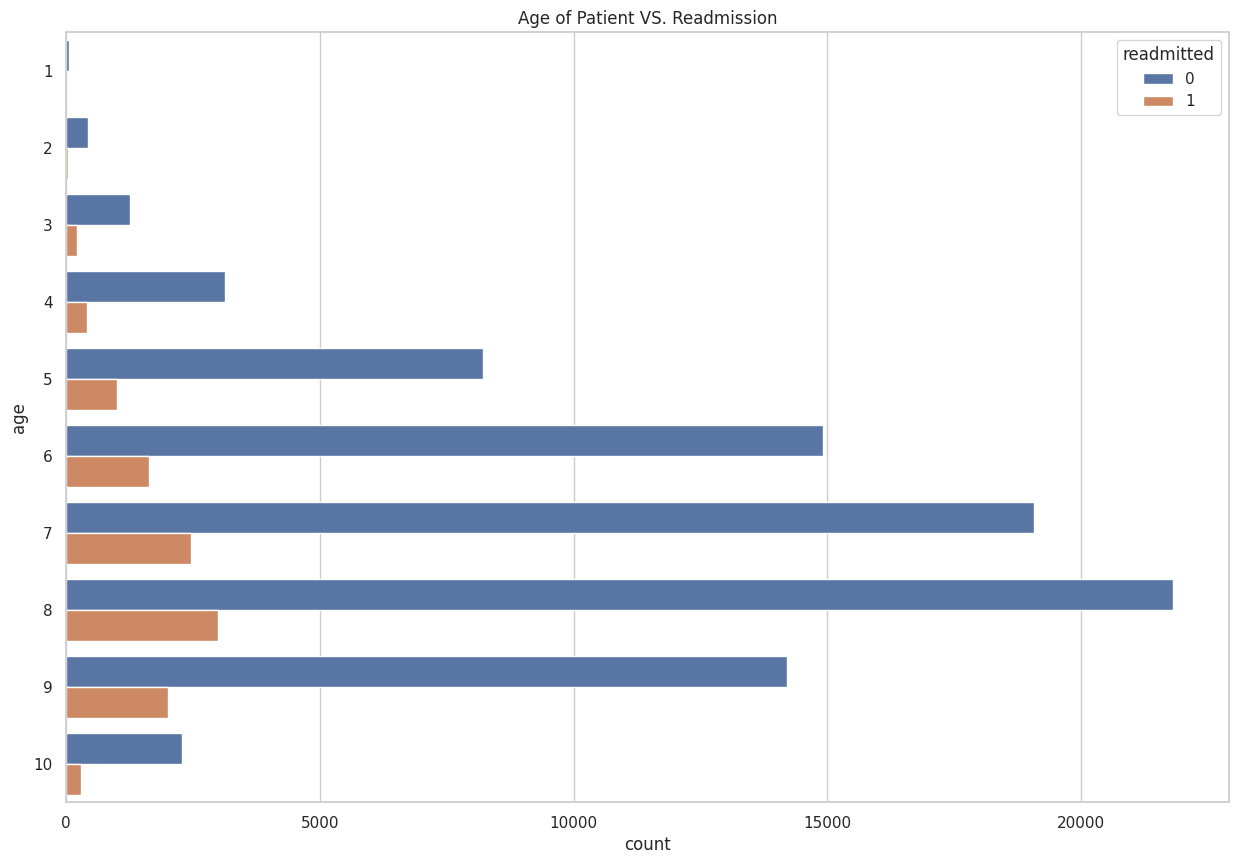

In [46]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<Axes: xlabel='count', ylabel='race'>

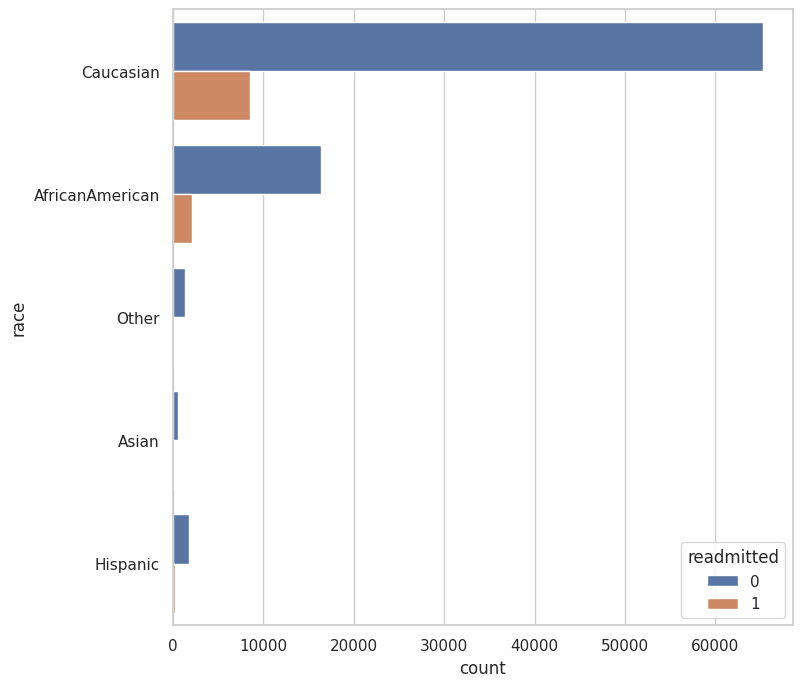

In [47]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

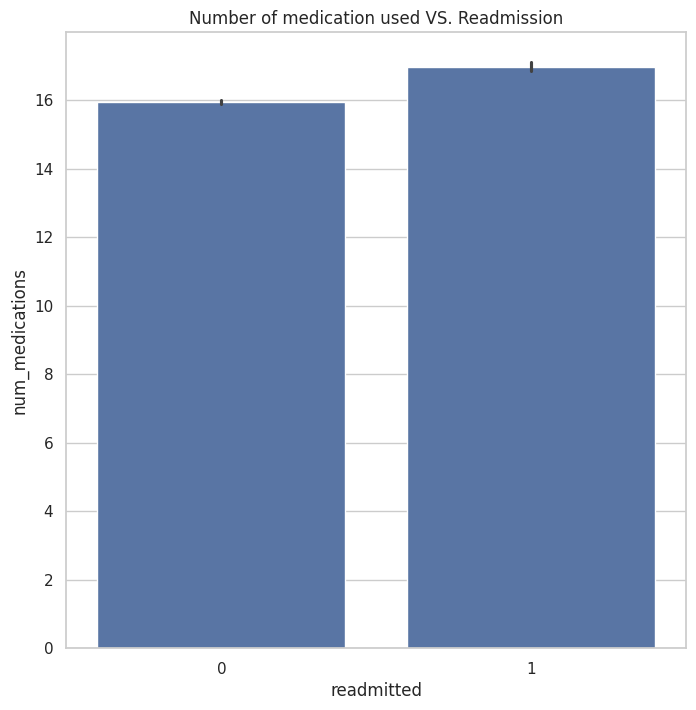

In [48]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

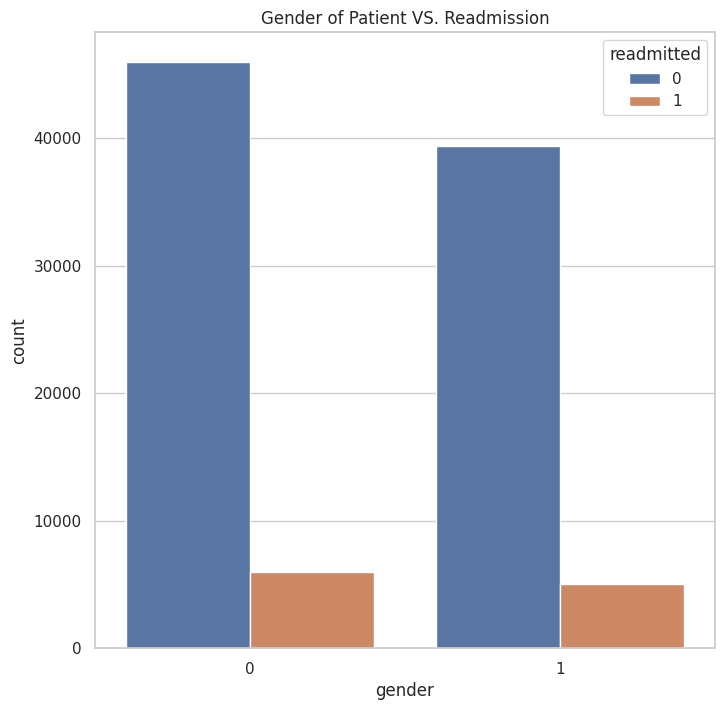

In [49]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title("Gender of Patient VS. Readmission")
plt.show()

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

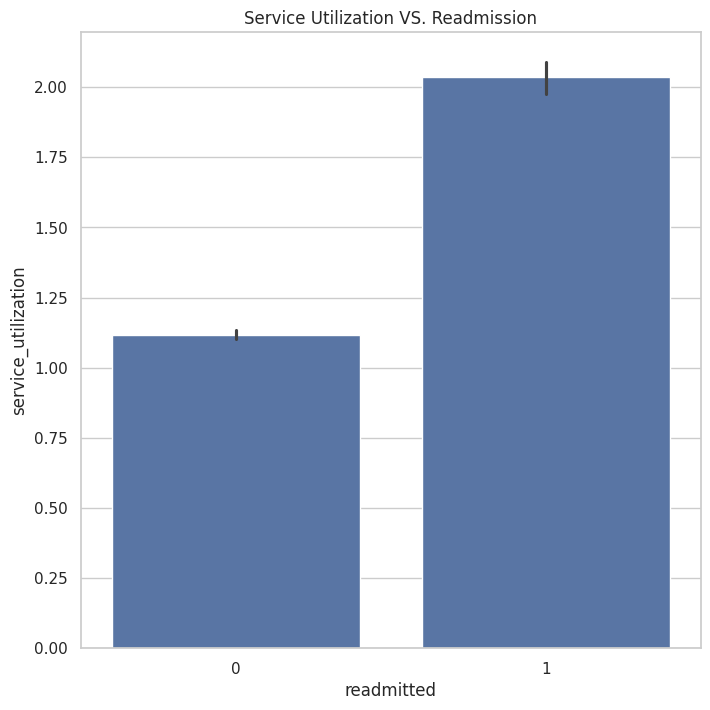

In [50]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

/tmp/ipython-input-1261402117.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
/tmp/ipython-input-1261402117.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

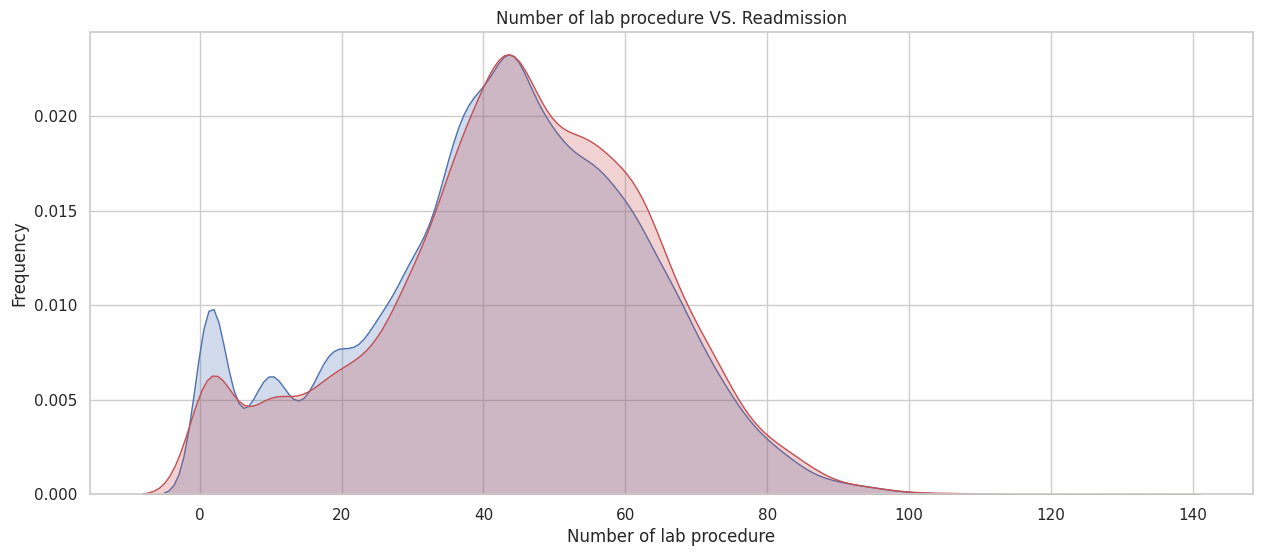

In [51]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

# Data Pre-processing

In [52]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64
age
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: count, dtype: int64


In [53]:
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
     'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
     'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
     'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
     'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
     'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

x = df[i].astype('object')

df.drop(i, axis=1, inplace=True)

df = pd.concat([df, x], axis=1)

In [54]:
df.dtypes

,0
race,object
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64
...,...
level1_diag2,object
level1_diag3,object
level2_diag1,object
level2_diag2,object


In [55]:
df[keys] = df[keys].replace({
    'No': 0,
    'Yes': 1,

})


/tmp/ipython-input-1583904850.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[keys] = df[keys].replace({


In [56]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

,count
nummed,
1,44589
0,22156
2,20901
3,7448
4,1290
5,57
6,5


In [57]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_medications',
 'pioglitazone',
 'insulin',
 'time_in_hospital',
 'number_inpatient',
 'numchange',
 'number_outpatient',
 'number_diagnoses',
 'glipizide',
 'metformin-pioglitazone',
 'num_lab_procedures',
 'num_procedures',
 'glipizide-metformin',
 'tolazamide',
 'repaglinide',
 'metformin-rosiglitazone',
 'rosiglitazone',
 'glimepiride',
 'tolbutamide',
 'nummed',
 'metformin',
 'nateglinide',
 'troglitazone',
 'acetohexamide',
 'number_emergency',
 'chlorpropamide',
 'acarbose',
 'glyburide',
 'glimepiride-pioglitazone',
 'miglitol',
 'primary_level2_diagnosis',
 'glyburide-metformin',
 'service_utilization']

In [58]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [59]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [60]:
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [61]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [62]:
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('Int64')

df.dtypes

,0
race,object
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64
number_diagnoses,int64
examide,object
citoglipton,object
readmitted,int64
service_utilization,int64


In [63]:
df = df.drop(['examide', 'citoglipton','encounter_id'], axis = 1)

In [64]:
df = pd.get_dummies(df, columns=['race'])

In [65]:
duplicate_columns = df.columns[df.columns.duplicated()]
df = df.loc[:, ~df.columns.duplicated(keep='first')]

In [66]:
df = pd.get_dummies(df, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)

In [67]:
import pandas as pd

# Features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']


In [68]:
X = df.drop(['readmitted', 'patient_nbr'], axis=1)
y = df['readmitted']


In [69]:
# Convert all columns to numeric (coerce non-numeric to NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaNs (caused by coercion) with 0 or median
X.fillna(0, inplace=True)


In [70]:
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert all categorical columns to numeric


In [71]:
cat_cols = X.select_dtypes(include='object').columns
train_data_x_encoded = pd.get_dummies(X, columns=cat_cols)


##  Performing lasso for feature selection.

In [72]:
from sklearn.linear_model import LassoCV          # Lasso regression with cross-validation
from sklearn.preprocessing import PolynomialFeatures  # Feature transformation for capturing non-linear relationships
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from imblearn.over_sampling import SMOTE            # Synthetic Minority Over-sampling Technique (SMOTE)
from sklearn.linear_model import Lasso

In [73]:
X = X.astype(int)


In [74]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [75]:
lasso_cv = LassoCV(alphas=np.logspace(-10, 10, 100), cv=5)
lasso_cv.fit(X_train_resampled, y_train_resampled)

LassoCV(alphas=array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876128e-07, 6.89261210e-07,
       1.09749877e-06, 1.74752840e-0...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
        cv=5)

In [76]:
best_alpha = lasso_cv.alpha_

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_resampled, y_train_resampled)

feature_importances = lasso_model.coef_

important_features = X_train.columns[feature_importances != 0]

print("Important features:")
print(important_features)

Important features:
Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange', 'primary_level2_diagnosis', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'diabetesMed', 'age', 'nummed',
       'num_medications|time_in_hospital', 'num_medications|num_procedures',
       'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'number_diagnoses|time_in_hospital', 'num_medications|numchange',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_1', 'admission_type_id_3', 'admission_type_id_5',
       'discharge_disposition_id_2', 'discharge_disposition_id_7',
       'discharge_dispositio

In [78]:
len(important_features)

55

# Modelling

# **LDA**

In [89]:

# Number of folds
k = 5

# Initialize lists for out-of-sample metrics
out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

# Initialize lists for in-sample metrics
in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X[important_features]):
    X, y = X[important_features], y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to balance the training data
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit LDA
    lda_model.fit(X_train_resampled, y_train_resampled)

    # Out-of-sample metrics
    y_pred = lda_model.predict(X_test)
    y_prob = lda_model.predict_proba(X_test)[:, 1]  # probability for ROC-AUC
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    # In-sample metrics
    y_pred_in_sample = lda_model.predict(X_train_resampled)
    y_prob_in_sample = lda_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

# Mean metrics across folds
mean_oos_accuracy = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision = np.mean(out_of_sample_precision_scores)
mean_oos_recall = np.mean(out_of_sample_recall_scores)
mean_oos_f1 = np.mean(out_of_sample_f1_scores)
mean_oos_auc = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision = np.mean(in_sample_precision_scores)
mean_in_sample_recall = np.mean(in_sample_recall_scores)
mean_in_sample_f1 = np.mean(in_sample_f1_scores)
mean_in_sample_auc = np.mean(in_sample_auc_scores)

print("Out-of-sample ROC-AUC:", mean_oos_auc)


Out-of-sample ROC-AUC: 0.532062057814543


In [92]:
mean_oos_accuracy_lda = mean_oos_accuracy
mean_oos_precision_lda = mean_oos_precision
mean_oos_recall_lda = mean_oos_recall
mean_oos_f1_lda = mean_oos_f1
mean_oos_auc_lda = mean_oos_auc
mean_in_sample_accuracy_lda = mean_in_sample_accuracy
mean_in_sample_precision_lda = mean_in_sample_precision
mean_in_sample_recall_lda = mean_in_sample_recall
mean_in_sample_f1_lda = mean_in_sample_f1
mean_in_sample_auc_lda = mean_in_sample_auc

## **Random Forest**

In [101]:
random_forest_model = RandomForestClassifier()

k = 5

out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []


kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X[important_features]):
    X_train, X_test = X[important_features].iloc[train_index], X[important_features].iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    random_forest_model.fit(X_train_resampled, y_train_resampled)

    y_pred = random_forest_model.predict(X_test)
    y_prob = random_forest_model.predict_proba(X_test)[:, 1]
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    y_pred_in_sample = random_forest_model.predict(X_train_resampled)
    y_prob_in_sample = random_forest_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

mean_oos_accuracy_2 = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision_2 = np.mean(out_of_sample_precision_scores)
mean_oos_recall_2 = np.mean(out_of_sample_recall_scores)
mean_oos_f1_2 = np.mean(out_of_sample_f1_scores)
mean_oos_auc_2 = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy_2 = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision_2 = np.mean(in_sample_precision_scores)
mean_in_sample_recall_2 = np.mean(in_sample_recall_scores)
mean_in_sample_f1_2 = np.mean(in_sample_f1_scores)
mean_in_sample_auc_2 = np.mean(in_sample_auc_scores)

print("Out-of-sample ROC-AUC:", mean_oos_auc)

Out-of-sample ROC-AUC: 0.5198625716385284


In [102]:
mean_oos_accuracy_Rf = mean_oos_accuracy_2
mean_oos_precision_Rf = mean_oos_precision_2
mean_oos_recall_Rf = mean_oos_recall_2
mean_oos_f1_Rf = mean_oos_f1_2
mean_oos_auc_Rf = mean_oos_auc_2
mean_in_sample_accuracy_Rf = mean_in_sample_accuracy_2
mean_in_sample_precision_Rf = mean_in_sample_precision_2
mean_in_sample_recall_Rf = mean_in_sample_recall_2
mean_in_sample_f1_Rf = mean_in_sample_f1_2
mean_in_sample_auc_Rf = mean_in_sample_auc_2

# **#SVM**

In [81]:
# Create SVM model with class weights to handle imbalance
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42,max_iter=10000)

# Number of folds
k = 5

# Initialize lists for out-of-sample metrics
out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

# Initialize lists for in-sample metrics
in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X[important_features]):
    X, y =X[important_features],y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit SVM
    svm_model.fit(X_train, y_train)

    # Out-of-sample metrics
    y_pred = svm_model.predict(X_test)
    y_prob = svm_model.predict_proba(X_test)[:, 1]  # probability for ROC-AUC
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    # In-sample metrics
    y_pred_in_sample = svm_model.predict(X_train)
    y_prob_in_sample = svm_model.predict_proba(X_train)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train, y_prob_in_sample))

# Mean metrics across folds
mean_oos_accuracy = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision = np.mean(out_of_sample_precision_scores)
mean_oos_recall = np.mean(out_of_sample_recall_scores)
mean_oos_f1 = np.mean(out_of_sample_f1_scores)
mean_oos_auc = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision = np.mean(in_sample_precision_scores)
mean_in_sample_recall = np.mean(in_sample_recall_scores)
mean_in_sample_f1 = np.mean(in_sample_f1_scores)
mean_in_sample_auc = np.mean(in_sample_auc_scores)

print("Out-of-sample ROC-AUC:", mean_oos_auc)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

Out-of-sample ROC-AUC: 0.4921554716834072


In [94]:
mean_oos_accuracy_svm = mean_oos_accuracy
mean_oos_precision_svm = mean_oos_precision
mean_oos_recall_svm = mean_oos_recall
mean_oos_f1_svm = mean_oos_f1
mean_oos_auc_svm = mean_oos_auc
mean_in_sample_accuracy_svm = mean_in_sample_accuracy
mean_in_sample_precision_svm = mean_in_sample_precision
mean_in_sample_recall_svm = mean_in_sample_recall
mean_in_sample_f1_svm = mean_in_sample_f1
mean_in_sample_auc_svm = mean_in_sample_auc

#KNN

In [95]:
# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=-1)  # You can tune n_neighbors

# Number of folds
k = 5

# Initialize lists for out-of-sample metrics
out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

# Initialize lists for in-sample metrics
in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X[important_features]):
    X, y = X[important_features],y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to balance the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Scale features for KNN
    scaler = StandardScaler()
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Fit KNN
    knn_model.fit(X_train_resampled, y_train_resampled)

    # Out-of-sample metrics
    y_pred = knn_model.predict(X_test_scaled)
    y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]  # probability for ROC-AUC
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    # In-sample metrics
    y_pred_in_sample = knn_model.predict(X_train_resampled)
    y_prob_in_sample = knn_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

# Mean metrics across folds
mean_oos_accuracy = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision = np.mean(out_of_sample_precision_scores)
mean_oos_recall = np.mean(out_of_sample_recall_scores)
mean_oos_f1 = np.mean(out_of_sample_f1_scores)
mean_oos_auc = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision = np.mean(in_sample_precision_scores)
mean_in_sample_recall = np.mean(in_sample_recall_scores)
mean_in_sample_f1 = np.mean(in_sample_f1_scores)
mean_in_sample_auc = np.mean(in_sample_auc_scores)

print("Out-of-sample ROC-AUC:", mean_oos_auc)

Out-of-sample ROC-AUC: 0.5506619872548483


In [97]:
mean_oos_accuracy_knn = mean_oos_accuracy
mean_oos_precision_knn = mean_oos_precision
mean_oos_recall_knn = mean_oos_recall
mean_oos_f1_knn = mean_oos_f1
mean_oos_auc_knn = mean_oos_auc
mean_in_sample_accuracy_knn = mean_in_sample_accuracy
mean_in_sample_precision_knn = mean_in_sample_precision
mean_in_sample_recall_knn = mean_in_sample_recall
mean_in_sample_f1_knn = mean_in_sample_f1
mean_in_sample_auc_knn = mean_in_sample_auc

#Naive Bayes

In [98]:
# Create Gaussian Naive Bayes model
nb_model = GaussianNB()

# Number of folds
k = 5

# Initialize lists for out-of-sample metrics
out_of_sample_accuracy_scores = []
out_of_sample_precision_scores = []
out_of_sample_recall_scores = []
out_of_sample_f1_scores = []
out_of_sample_auc_scores = []

# Initialize lists for in-sample metrics
in_sample_accuracy_scores = []
in_sample_precision_scores = []
in_sample_recall_scores = []
in_sample_f1_scores = []
in_sample_auc_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X[important_features]):
    X, y = X[important_features], y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to balance the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Optional: scale features for Naive Bayes (GaussianNB works without scaling, but scaling can help)
    scaler = StandardScaler()
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Fit Naive Bayes
    nb_model.fit(X_train_resampled, y_train_resampled)

    # Out-of-sample metrics
    y_pred = nb_model.predict(X_test_scaled)
    y_prob = nb_model.predict_proba(X_test_scaled)[:, 1]
    out_of_sample_accuracy_scores.append(accuracy_score(y_test, y_pred))
    out_of_sample_precision_scores.append(precision_score(y_test, y_pred))
    out_of_sample_recall_scores.append(recall_score(y_test, y_pred))
    out_of_sample_f1_scores.append(f1_score(y_test, y_pred))
    out_of_sample_auc_scores.append(roc_auc_score(y_test, y_prob))

    # In-sample metrics
    y_pred_in_sample = nb_model.predict(X_train_resampled)
    y_prob_in_sample = nb_model.predict_proba(X_train_resampled)[:, 1]
    in_sample_accuracy_scores.append(accuracy_score(y_train_resampled, y_pred_in_sample))
    in_sample_precision_scores.append(precision_score(y_train_resampled, y_pred_in_sample))
    in_sample_recall_scores.append(recall_score(y_train_resampled, y_pred_in_sample))
    in_sample_f1_scores.append(f1_score(y_train_resampled, y_pred_in_sample))
    in_sample_auc_scores.append(roc_auc_score(y_train_resampled, y_prob_in_sample))

# Mean metrics across folds
mean_oos_accuracy = np.mean(out_of_sample_accuracy_scores)
mean_oos_precision = np.mean(out_of_sample_precision_scores)
mean_oos_recall = np.mean(out_of_sample_recall_scores)
mean_oos_f1 = np.mean(out_of_sample_f1_scores)
mean_oos_auc = np.mean(out_of_sample_auc_scores)

mean_in_sample_accuracy = np.mean(in_sample_accuracy_scores)
mean_in_sample_precision = np.mean(in_sample_precision_scores)
mean_in_sample_recall = np.mean(in_sample_recall_scores)
mean_in_sample_f1 = np.mean(in_sample_f1_scores)
mean_in_sample_auc = np.mean(in_sample_auc_scores)

print("Out-of-sample ROC-AUC:", mean_oos_auc)

Out-of-sample ROC-AUC: 0.5198625716385284


In [99]:
mean_oos_accuracy_nb = mean_oos_accuracy
mean_oos_precision_nb = mean_oos_precision
mean_oos_recall_nb = mean_oos_recall
mean_oos_f1_nb = mean_oos_f1
mean_oos_auc_nb = mean_oos_auc
mean_in_sample_accuracy_nb = mean_in_sample_accuracy
mean_in_sample_precision_nb = mean_in_sample_precision
mean_in_sample_recall_nb = mean_in_sample_recall
mean_in_sample_f1_nb = mean_in_sample_f1
mean_in_sample_auc_nb = mean_in_sample_auc

In [104]:
import pandas as pd

metrics_data = {
    "Model": ["LDA", "Random Forest", "SVM", "KNN", "Naive Bayes"],
    "Mean_OOS_Accuracy": [
        mean_oos_accuracy_lda, mean_oos_accuracy_Rf, mean_oos_accuracy_svm,
        mean_oos_accuracy_knn, mean_oos_accuracy_nb
    ],
    "Mean_OOS_Precision": [
        mean_oos_precision_lda, mean_oos_precision_Rf, mean_oos_precision_svm,
        mean_oos_precision_knn, mean_oos_precision_nb
    ],
    "Mean_OOS_Recall": [
        mean_oos_recall_lda, mean_oos_recall_Rf, mean_oos_recall_svm,
        mean_oos_recall_knn, mean_oos_recall_nb
    ],
    "Mean_OOS_F1_Score": [
        mean_oos_f1_lda, mean_oos_f1_Rf, mean_oos_f1_svm,
        mean_oos_f1_knn, mean_oos_f1_nb
    ],
    "Mean_OOS_AUC": [
        mean_oos_auc_lda, mean_oos_auc_Rf, mean_oos_auc_svm,
        mean_oos_auc_knn, mean_oos_auc_nb
    ],
    "Mean_In_Sample_Accuracy": [
        mean_in_sample_accuracy_lda, mean_in_sample_accuracy_Rf, mean_in_sample_accuracy_svm,
        mean_in_sample_accuracy_knn, mean_in_sample_accuracy_nb
    ],
    "Mean_In_Sample_Precision": [
        mean_in_sample_precision_lda, mean_in_sample_precision_Rf, mean_in_sample_precision_svm,
        mean_in_sample_precision_knn, mean_in_sample_precision_nb
    ],
    "Mean_In_Sample_Recall": [
        mean_in_sample_recall_lda, mean_in_sample_recall_Rf, mean_in_sample_recall_svm,
        mean_in_sample_recall_knn, mean_in_sample_recall_nb
    ],
    "Mean_In_Sample_F1_Score": [
        mean_in_sample_f1_lda, mean_in_sample_f1_Rf, mean_in_sample_f1_svm,
        mean_in_sample_f1_knn, mean_in_sample_f1_nb
    ],
    "Mean_In_Sample_AUC": [
        mean_in_sample_auc_lda, mean_in_sample_auc_Rf, mean_in_sample_auc_svm,
        mean_in_sample_auc_knn, mean_in_sample_auc_nb
    ],
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.T

,0,1,2,3,4
Model,LDA,Random Forest,SVM,KNN,Naive Bayes
Mean_OOS_Accuracy,0.816986,0.871928,0.816986,0.814041,0.581859
Mean_OOS_Precision,0.128823,0.17855,0.128823,0.149948,0.123163
Mean_OOS_Recall,0.103165,0.032379,0.103165,0.132922,0.43212
Mean_OOS_F1_Score,0.114559,0.054802,0.114559,0.140901,0.191677
Mean_OOS_AUC,0.532062,0.585458,0.532062,0.550662,0.519863
Mean_In_Sample_Accuracy,0.872486,0.999997,0.872486,0.914097,0.74576
Mean_In_Sample_Precision,0.902646,1.0,0.902646,0.93195,0.690499
Mean_In_Sample_Recall,0.835034,0.999994,0.835034,0.893432,0.890817
Mean_In_Sample_F1_Score,0.867524,0.999997,0.867524,0.912285,0.777968


In [105]:
metrics_df.to_csv("Model_Comparison_Results.csv", index=False)
